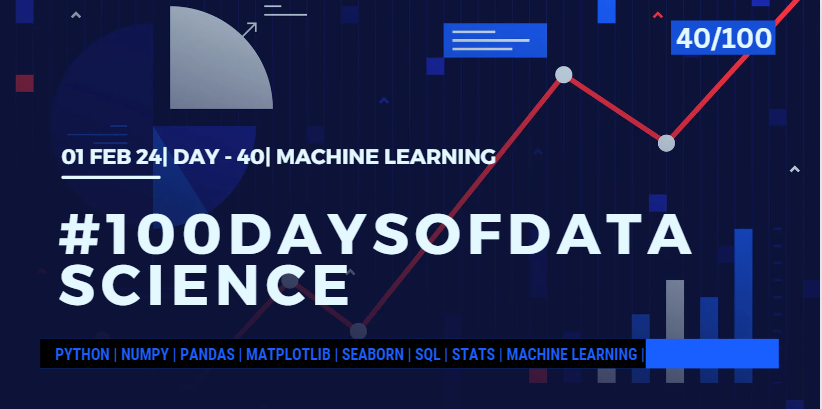

# <center>Cross Validation in Machine Learning📊<center>
* Cross-validation is a Statistical Method used to estimate the performance (or
accuracy) of machine learning models.
* It is used to protect against overfitting in a predictive model, particularly in a case
where the amount of data may be limited.
* In cross-validation, you make a fixed number of folds (or partitions) of the data, run
the analysis on each fold, and then average the overall error estimate
* There are different Cross-Validation techniques
    1. Hold-out cross-validation
    2. K-folds cross-validation
    3. Leave-one-out cross-validation
    4. Leave-p-out cross-validation
    5. Stratified K-folds cross-validation
    6. Repeated K-folds cross-validation
    7. Time series CV cross-validation

### 1. Holdout cross-validation
* It Also called a train-test split.
* Holdout cross-validation has the entire dataset partitioned randomly into atraining set and a validation set.
* A rule of thumb to partition data is that nearly 70% of the whole dataset will be used as a training set and the remaining 30% will be used as a validation set.
* Since the dataset is split into only two sets, the model is built just one time on the training set and executed faster.

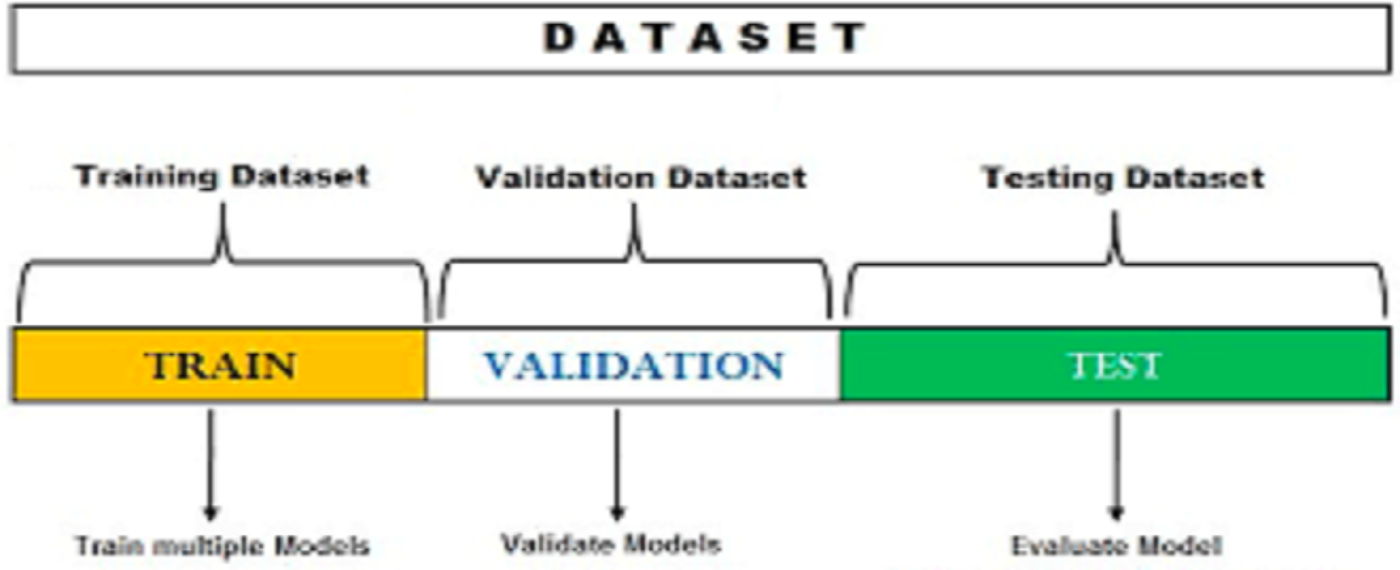

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=111)

### 2. K-fold cross-validation
* In this technique, the whole dataset is partitioned in k parts of equal size and each partition is called a fold.
* It’s known as k-fold since there are k parts where k can be any integer - 3,4,5, etc.
* One fold is used for validation and other K-1 folds are used for training the model.
* To use every fold as a validation set and other left-outs as a training set, this technique is repeated k times until each fold is used once.

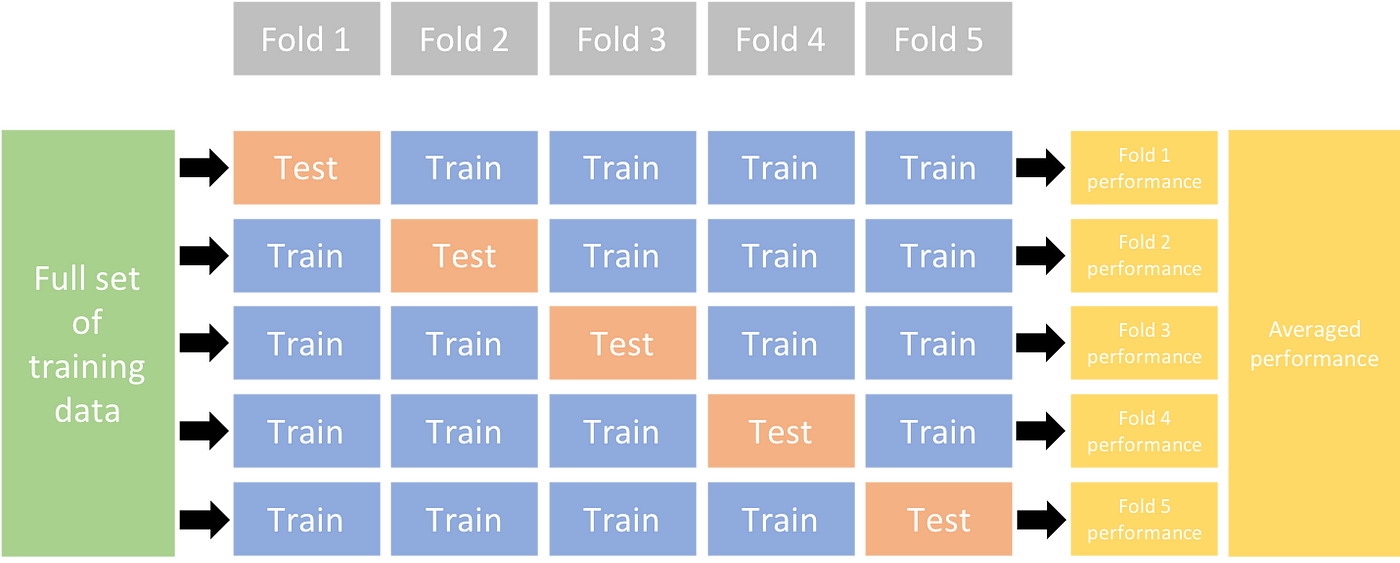

In [2]:
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### 3. Leave-one-out cross-validation
* Leave-one-out сross-validation (LOOCV) is an extreme case of k-Fold CV. Imagine if k is equal to n where n is the number of samples in the dataset. Such k-Fold case is equivalent to Leave-one-out technique.
* The leave-one-out cross-validation method is computationally expensive to perform and shouldn’t be used with very large datasets.
* The good news is that the technique is very simple and requires no configuration to specify.
* It also provides a reliable and unbiased estimate for your model performance.

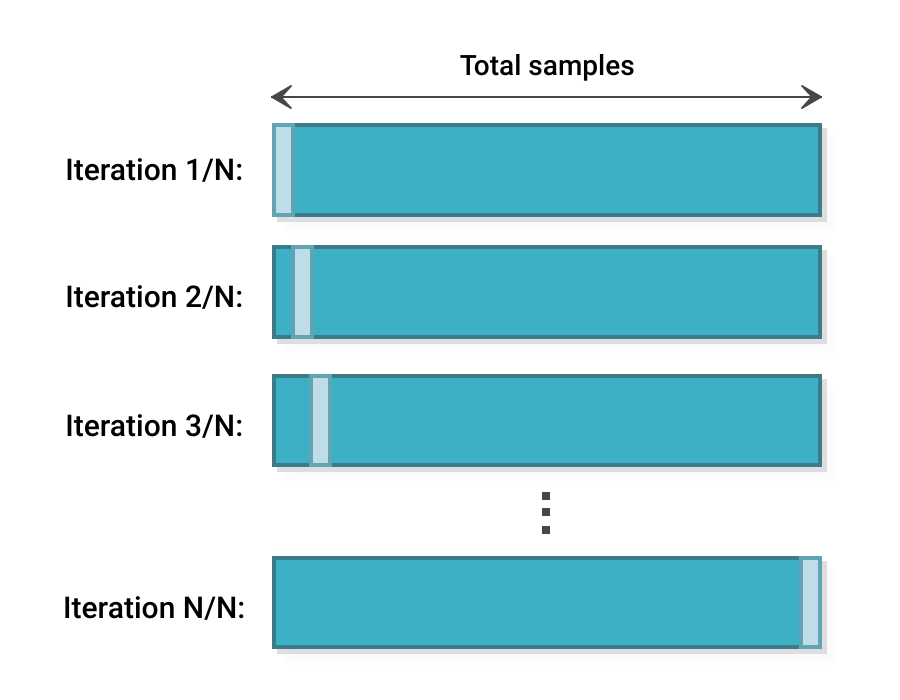

In [3]:
from sklearn.model_selection import LeaveOneOut

X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1] TEST: [0]
TRAIN: [0] TEST: [1]


### 4. Leave-p-out cross-validation
* An exhaustive cross-validation technique, p samples are used as the validation set and n-p samples are used as the training set if a dataset has n samples.
* The process is repeated until the entire dataset containing n samples gets divided on the validation set of p samples and the training set of n-p samples.
* This continues till all samples are used as a validation set.
* The technique, which has a high computation time, produces good results.
* However, it’s not considered ideal for an imbalanced dataset and is deemed to be a computationally unfeasible method.
* This is because if the training set has all samples of one class, the model will not be able to properly generalize and will become biased to either of the classes.
* Leave-p-out cross-validation (LpOC) is similar to Leave-one-out CV as it creates all the possible training and test sets by using p samples as the test set. All mentioned about LOOCV is true and for LpOC.

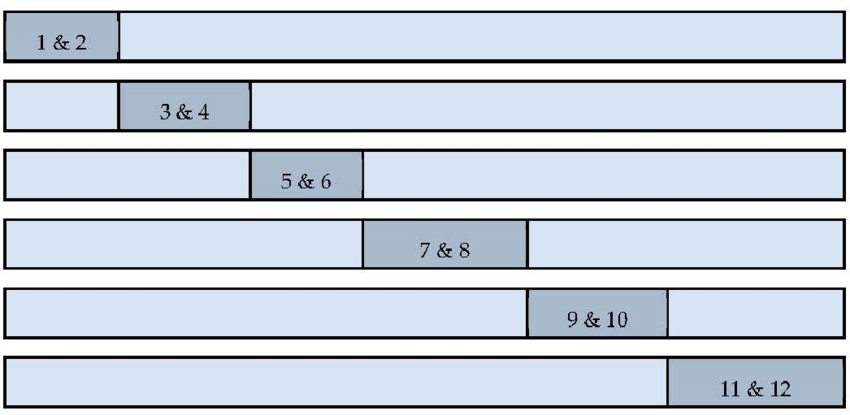

In [4]:
from sklearn.model_selection import LeavePOut

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
lpo = LeavePOut(2)

for train_index, test_index in lpo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [1 3] TEST: [0 2]
TRAIN: [1 2] TEST: [0 3]
TRAIN: [0 3] TEST: [1 2]
TRAIN: [0 2] TEST: [1 3]
TRAIN: [0 1] TEST: [2 3]


### 5. Stratified k-fold cross-validation
* k-fold validation can’t be used for imbalanced datasets because data is split into k-folds with a uniform probability distribution.
* Not so with stratified k-fold, which is an enhanced version of the k-fold crossvalidation technique.
* Although it too splits the dataset into k equal folds, each fold has the same ratio of instances of target variables that are in the complete dataset.
* This enables it to work perfectly for imbalanced datasets, but not for timeseries data.

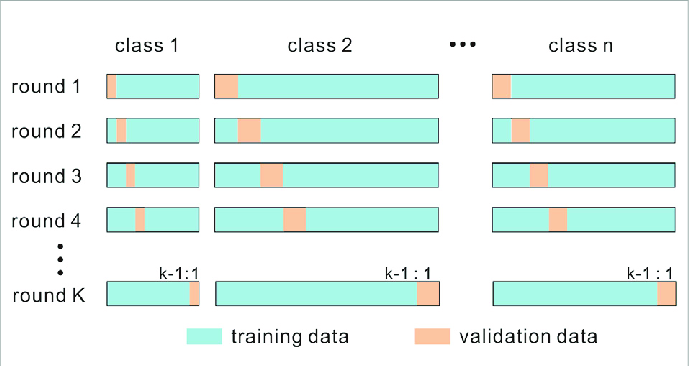

In [5]:
from sklearn.model_selection import StratifiedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


### 6. Repeated k-Fold cross-validation
* Repeated k-Fold cross-validation or Repeated random sub-sampling CV is probably the most robust of all CV techniques in this paper. 
* It is a variation of k-Fold but in the case of Repeated k-Folds k is not the number of folds. 
* It is the number of times we will train the model.
* The general idea is that on every iteration we will randomly select samples all over the dataset as our test set. For example, if we decide that 20% of the dataset will be our test set, 20% of samples will be randomly selected and the rest 80% will become the training set. 

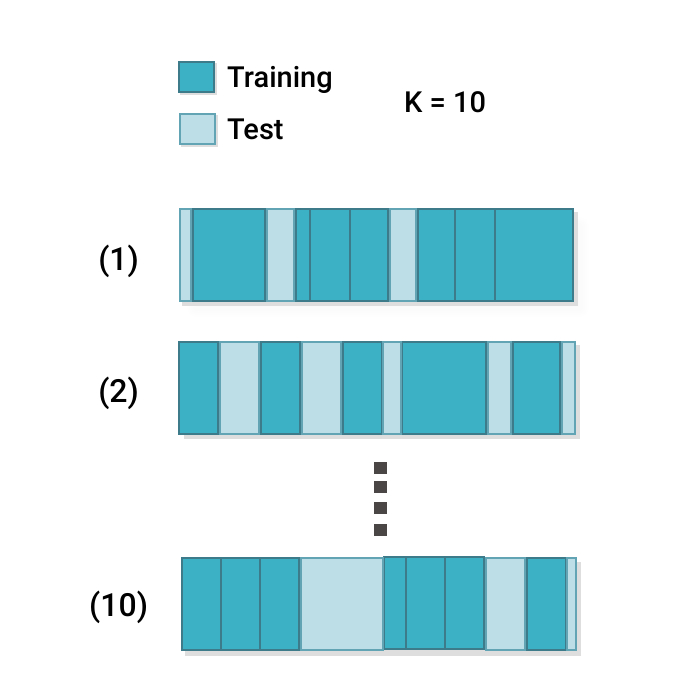

In [6]:
from sklearn.model_selection import RepeatedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=42)

for train_index, test_index in rkf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 2] TEST: [1 3]
TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]
TRAIN: [1 3] TEST: [0 2]


### 7.Time-series cross-validation
* Traditional cross-validation techniques don’t work on sequential data such as time-series because we cannot choose random data points and assign them to either the test set or the train set as it makes no sense to use the values from the future to forecast values in the past. 
* There are mainly two ways to go about this:
    1. Rolling cross-validation
    2. Blocked cross-validation

#### Rolling cross-validation
Cross-validation is done on a rolling basis i.e. starting with a small subset of data for training purposes, predicting the future values, and then checking the accuracy on the forecasted data points. The following image can help you get the intuition behind this approach.

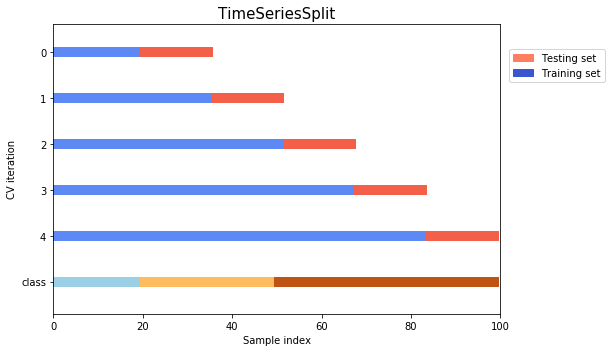



#### Blocked cross-validation
The first technique may introduce leakage from future data to the model. The model will observe future patterns to forecast and try to memorize them. That’s why blocked cross-validation was introduced. 

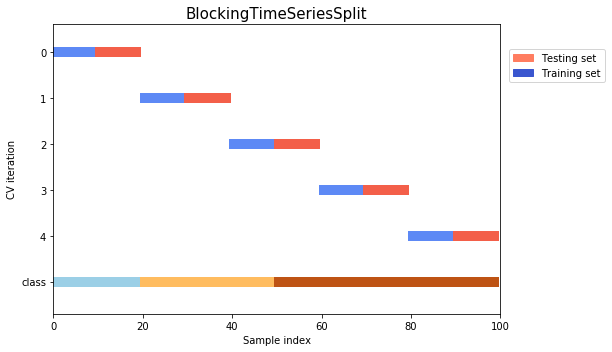